### Parameters to study

| Algorithm             | Step Size (lr) | Momentum Param | Regularization Param | Stochastic Aspect | Dataset_size |
|-----------------------|:--------------:|:-------------:|:--------------------:|:-----------------:| ------------:|
| Gradient              | X              |               |                     |                  |         |
| Accelerated Gradient  | X              | X             |                     |                  |        |
| Sub-gradient          | X              |               |                     |                  |       |
| Proximal Gradient     | X              |               | X                   |                  |      |
| Stochastic Gradient   | X              |               |                     | batch size/w or without shuffle                |


### for the svm problem
Modifying the distribution, the sample size and the c parameter

In [16]:
from functions import *



n = 10000
d = 100
#Generate a dataset
X, y = generate_dataset(n, d)
A = np.c_[np.ones(n), X]


In [17]:
import pandas as pd
import numpy as np

# Example of running each (completed) gradient-based method in functions.py 
# for a range of learning rates and storing the final objectives in a DataFrame.


# We assume that 'A' (shape (n,d+1)), 'y' (shape (n,)), and 'd' are already defined.
# We also assume the gradient methods in 'functions.py' are complete and can be called here.

learning_rates = [1e-3, 1e-2, 1e-1, 1.0]
num_iterations = 50
initial_x = np.zeros(A.shape[1])  # for example

results_list = []

for lr_test in learning_rates:
    # Gradient Descent
    gd_objectives, gd_params = gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test)
    results_list.append({
        'method': 'GradientDescent',
        'lr': lr_test,
        'final_objective': gd_objectives[-1]
    })
    
    # Accelerated Gradient Descent
    agd_objectives, agd_params = accelerated_gradient_descent(y, A, initial_x.copy(), num_iterations)
    # (Note: accelerated_gradient_descent as written does not take lr, so we skip passing it)
    results_list.append({
        'method': 'AcceleratedGD',
        'lr': lr_test,
        'final_objective': agd_objectives[-1]
    })
    

    # Proximal Gradient
    prox_objectives, prox_params = prox_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=0.1)
    results_list.append({
        'method': 'ProximalGD',
        'lr': lr_test,
        'final_objective': prox_objectives[-1]
    })

    # Subgradient
    subg_objectives, subg_params = subgradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=0.1)
    results_list.append({
        'method': 'Subgradient',
        'lr': lr_test,
        'final_objective': subg_objectives[-1]
    })


    # Stochastic Gradient Descent
    sgd_objectives, sgd_params = stoc_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, batch_size=10)
    results_list.append({
        'method': 'StochasticGD',
        'lr': lr_test,
        'final_objective': sgd_objectives[-1]
    })

# Convert the collected results into a dataframe
df_results = pd.DataFrame(results_list)
df_results

GD(0000/0000/9999): objective = 3720582361.10
GD(0001/0001/9999): objective = 3712899958.12
GD(0002/0002/9999): objective = 3705233555.42
GD(0003/0003/9999): objective = 3697583119.42
GD(0004/0004/9999): objective = 3689948616.59
GD(0005/0005/9999): objective = 3682330013.49
GD(0006/0006/9999): objective = 3674727276.75
GD(0007/0007/9999): objective = 3667140373.04
GD(0008/0008/9999): objective = 3659569269.15
GD(0009/0009/9999): objective = 3652013931.90
GD(0010/0010/9999): objective = 3644474328.19


GD(0011/0011/9999): objective = 3636950425.01
GD(0012/0012/9999): objective = 3629442189.40
GD(0013/0013/9999): objective = 3621949588.47
GD(0014/0014/9999): objective = 3614472589.40
GD(0015/0015/9999): objective = 3607011159.45
GD(0016/0016/9999): objective = 3599565265.94
GD(0017/0017/9999): objective = 3592134876.26
GD(0018/0018/9999): objective = 3584719957.87
GD(0019/0019/9999): objective = 3577320478.31
GD(0020/0020/9999): objective = 3569936405.16
GD(0021/0021/9999): objective = 3562567706.10
GD(0022/0022/9999): objective = 3555214348.85
GD(0023/0023/9999): objective = 3547876301.23
GD(0024/0024/9999): objective = 3540553531.10
GD(0025/0025/9999): objective = 3533246006.41
GD(0026/0026/9999): objective = 3525953695.15
GD(0027/0027/9999): objective = 3518676565.41
GD(0028/0028/9999): objective = 3511414585.32
GD(0029/0029/9999): objective = 3504167723.09
GD(0030/0030/9999): objective = 3496935947.01
GD(0031/0031/9999): objective = 3489719225.41
GD(0032/0032/9999): objective = 34

,method,lr,final_objective
0,GradientDescent,0.001,3.362357e+09
1,AcceleratedGD,0.001,9.663051e+05
2,ProximalGD,0.001,3.362858e+09
3,Subgradient,0.001,3.362848e+09
4,StochasticGD,0.001,3.426484e+09
5,GradientDescent,0.010,1.326270e+09
6,AcceleratedGD,0.010,9.663051e+05
7,ProximalGD,0.010,1.328783e+09
8,Subgradient,0.010,1.328744e+09
9,StochasticGD,0.010,1.852645e+09


/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

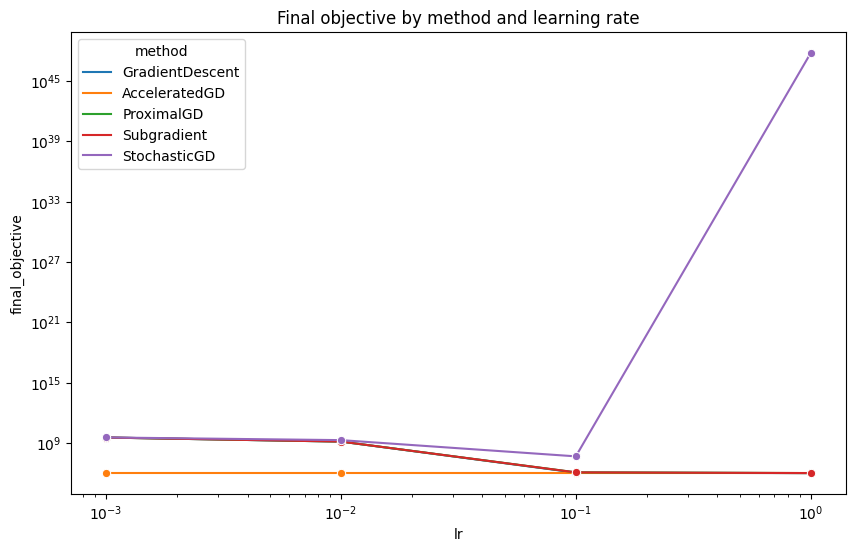

In [19]:
#plot the result of the gradient descent by method and by learning rate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='lr', y='final_objective', hue='method', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Final objective by method and learning rate')
plt.show()